# Part I - Ford GoBike System Data Analysis
## by Omoniyi Akinpelumi

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

The main goal of this data analysis is to find and explore important features of the bike sharing dataset which would provide useful insights on the bike-sharing system operations

Some of the questions this project analysis seeks to investigate by exploring the relationships between the dataset features are as follows:  
- Whether most bike trips are affected by time of day, day of week and month of year? 
- Are bike trips influenced by type of user groups?
- Is Gender and age a factor in bike-sharing system operational in Greater San Francisco Bay? 
- What is the average speed of the bikers withn respect to other important features

## Preliminary Wrangling


In [206]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs
import os

%matplotlib inline

In [207]:
df = pd.read_csv(r'C:\Users\omoni\OneDrive - The University of Manchester\Huawei Laptop\DS_ML_AI\ALT-X\Project 3\Submission\FordGoBike_TripData.csv')

#### Check for data quality issues 

In [208]:
#Check for the dataset structure
df.shape

(183412, 16)

In [209]:
#Inspect dataset for data quality
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [210]:
#for the purpose of proper data analysis, it would be good to drop all null values from the dataset
df2 = df.dropna()

In [211]:
#It would also be good to drop all duplicates, if any
df2 = df2.drop_duplicates()

In [212]:
#Explore statistical analysis of numeric variables of the dataset
df2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [213]:
#Reset the index of the dataframe
df3 = df2.reset_index(drop=True)
df3.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
174949,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
174950,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
174951,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


#### Check for data structure/tidness issues 

In [214]:
#It is noticed that the member_birth_year, end_station_id and start_station_id are in the wrong datatype and need to be converted to int
df3['member_birth_year'] = df3['member_birth_year'].astype(int)
df3['end_station_id'] = df3['end_station_id'].astype(int)
df3['start_station_id'] = df3['start_station_id'].astype(int)

In [215]:
#Convert the start time and end time to 
df3['start_time'] = pd.to_datetime(df3['start_time'])
df3['end_time'] = pd.to_datetime(df3['end_time'])

In [216]:
df3.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No


In [217]:
#Extract details from start-time feature for each trip. This is more important than end_time as we have a duration feature 
df3['start_month'] = df3['start_time'].dt.month
df3['start_day'] = df3['start_time'].dt.day_name()

In [218]:
#Extract details from end-time feature for each trip. This is more important than end_time as we have a duration feature 
df3['end_month'] = df3['end_time'].dt.month

In [219]:
#Categorizing the start and end time into different time periods of the day using a custom function 
df3['start_time'] = df3['start_time'].astype(str)
df3['start_hour'] = (df3['start_time'].apply(lambda x: x[11:13])).astype(int)

df3['end_time'] = df3['end_time'].astype(str)
df3['end_hour'] = (df3['end_time'].apply(lambda x: x[11:13])).astype(int)

def time_period(x):
    if (x >= 0) & (x < 12):
        return 'Morning'
    elif (x >= 12) & (x < 17):
        return 'Afternoon'
    elif (x >= 17) & (x < 19):
        return 'Evening'
    elif (x >= 19) & (x < 24):
        return 'Night'
    
df3['start_period'] = [time_period(x) for x in df3['start_hour']]
df3['end_period'] = [time_period(x) for x in df3['end_hour']]

In [220]:
# re-structure the member_birth_year into bins of age groups, although not clean, we need to visualize it to get clearer details about the data values 
#Using pd.cut() - where Elderly (1877-1972), Adult(1972 - 1992), Youth(1992 -2001) 

df3['age_grade'] = pd.cut(df3['member_birth_year'], bins = [1877, 1972, 1985, 1995, 2001], labels=['Elderly','Old Adult','Young Adult','Youth'])

In [221]:
#Determine the distance between each of the coordinates using haversine function

def calc_distance(lat1, long1, lat2, long2):
    loc1 = (lat1,long1)
    loc2 = (lat2,long2)
    
    return (hs.haversine(loc1,loc2))*1000
  
df3['distance_m'] = [calc_distance(df3.iloc[i,5],df3.iloc[i,6],df3.iloc[i,9],df3.iloc[i,10]) for i in range(df3.shape[0])]

In [222]:
#Determine the statitical characteristics of the numerical values for distance and duration
df3['distance_m'].describe()
df3['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [223]:
#Since we have the distance and the time taken for a trip, we can compute the average speed   
df3['ave_speed_m/s'] = df3['distance_m']/df3['duration_sec']

In [224]:
#convert the feature of distance and duration from metres and secs to Kilometers and minutes 
df3['distance_km'] = df3['distance_m']/1000
df3['duration_mins'] = df3['duration_sec']/60

In [225]:
#Remove outlier in from distance_km feature
outlier_dist_index = df3[df3['distance_km'] > 60].index
df3 = df3.drop(outlier_dist_index)

In [226]:
#Drop columns that are not needed for analysis
df4 = df3.drop(['end_station_name','start_station_name','start_time','duration_sec','distance_m','end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1)

In [227]:
df4.shape

(174951, 18)

In [228]:
df4.bike_id.nunique()

4607

In [229]:
df4.columns

Index(['start_station_id', 'end_station_id', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_month', 'start_day', 'end_month', 'start_hour', 'end_hour',
       'start_period', 'end_period', 'age_grade', 'ave_speed_m/s',
       'distance_km', 'duration_mins'],
      dtype='object')

In [230]:
df4.start_station_id.nunique()

329

In [231]:
df4.end_station_id.nunique()

329

### What is the structure of your dataset?

> The modified dataset has 174952 observations and 18 features. Within this data are 4607 unique bikers and 329 unique bike station information to be analysed. These dataset alse have a good mixture of strings, floats and int data types. 

### What is/are the main feature(s) of interest in your feature engineered dataset?
The main features of the dataset are the 
- Duration of trip
- Time/Date of trip
- Distance of Trip (culled from feature engineering the Latitiude and Longitiude coordinates)
- Bike user type category
- Bike gender
- Biker age grade
- Biker distance
- Biker average speed

## Univariate Exploration


##### Question 1: What is the age frequency distribution of the bike-sharing data like ? Are there any outliers?

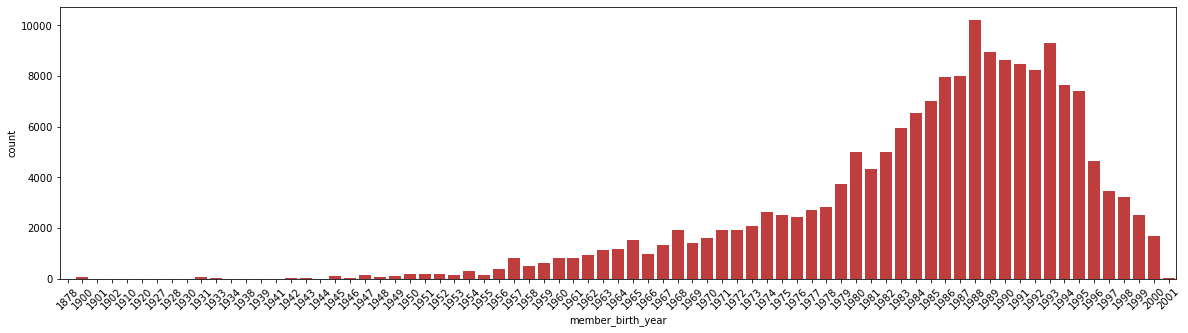

In [232]:
#Explore the age frequency distribution of biker data points
plt.figure(figsize=[20,5])
sns.countplot(data=df4, x='member_birth_year', color=sns.color_palette()[3])
plt.xticks(rotation=45);

>**Observation**: It is clear that there are some outliers within this field considering we have age data for year 1900, 1931 to 1933. In generating realistic data analysis for an end period of 2022, data values for bikers with birth year below 1942 would be truncated.

In [233]:
#drop indexes of outlier years
outlier_years_index = df4[df4['member_birth_year'] < 1942].index
df5 = df4.drop(outlier_years_index)

<AxesSubplot:xlabel='age_grade', ylabel='count'>

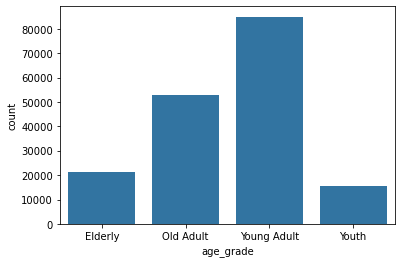

In [234]:
#Use seaborn to plot bar chart visualization of biker age categories by absolute frequency using same color 
base_color = sns.color_palette()[0]
sns.countplot(data=df5, x='age_grade', color=base_color)

>**Observation**: The bar chart data viz shows that majority of the bikers are young adults between the years of (1985 - 1995) followed by the Older Adults (1972 - 1985). Furthermore, the data visualization plot reveals that more elderly people are willing to participate in the bike sharing scheme than the youths in the San Franscisco bay area.  

##### Question 2: What are the proportions of biker-sharing options, biker user and gender group distribution of the bike-sharing data? Use Pie chart to illustrate their relative frequencies

In [235]:
#pie chart generation function
def pie_chart(col_name, label_name):
    sorted_counts = df5[col_name].value_counts()
    plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, autopct='%.0f%%')
    plt.axis('square');
    plt.xlabel(label_name)

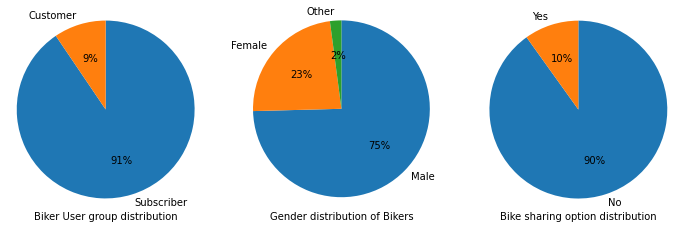

In [236]:
plt.figure(figsize=[12,5])
#illustrate the biker user group distribution using relative frequencies
plt.subplot(1,3,1)
pie_chart('user_type','Biker User group distribution')

#illustrate the gender group distribution of bikers using its relative frequencies
plt.subplot(1,3,2)
pie_chart('member_gender','Gender distribution of Bikers')

#illustrate the bike sharing options 
plt.subplot(1,3,3)
pie_chart('bike_share_for_all_trip','Bike sharing option distribution')

>**Observation**: It is observed that there is an overwhelming large disparity of subscribers, male members and bike sharing option(No) in the dataset compared with other groups. 91% of bikers are subscribers while 9% are customers. 75% of the bikers are males while 23% are females, 2% identify as others. 10% of the bikers in this dataset prefer the biker sharing option


##### What is the relationship between start hour and end hour for the bike trips. What is their distribution like?? 

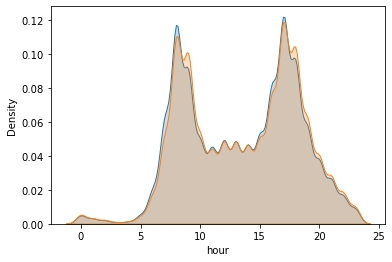

In [237]:
#plot of the start-hour and end-hour distribution
sns.kdeplot(df5.start_hour, shade=True) #blue color
sns.kdeplot(df5.end_hour, shade=True) #orange color
plt.xlabel('hour')
plt.show()

>**Observation**: It is observed from the kde plot there is not much difference between the start hour and end hour of bike trips but that there are bi-modal distributions for the start and end bike trips with the two peak bike trip demands at the morning and evening periods 

##### Question 3: What is the relationship between the duration and travel distance distribution of the bike-sharing data

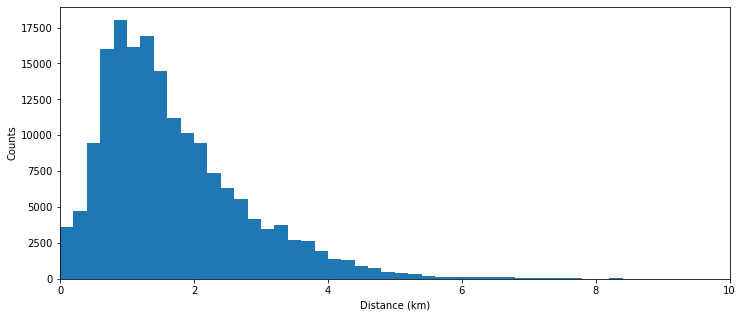

<Figure size 864x360 with 0 Axes>

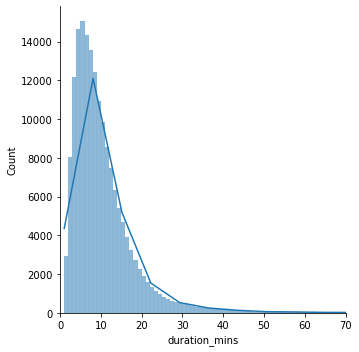

In [238]:
#Use matplotlib hist plot function to explore the bike trip distance distribution of the dataset
plt.figure(figsize=[12,5])
bins = np.arange(0,df5['distance_km'].max()+1.1,0.2)
plt.hist(data=df5, x='distance_km', bins=bins);
plt.xlim((0,10))
plt.xlabel('Distance (km)')
plt.ylabel('Counts')

#Use seaborn distplot function to explore the bike trip travel duration distribution of the datset
plt.figure(figsize=[12,5])
bins = np.arange(0,df5['duration_mins'].max()+1.1,1);
sns.displot(df5['duration_mins'], bins=bins, kde=True);
plt.xlim(0,70);

>**Observation**: The histogram plots depicting the bike trip distance shows a right-skewed distribution with a peak modal distance of about 1400m (1.4km). Also, statisitcal data reveals that 75% of the bikers covered a distance of 2.2km. For the bike trip duration, using a seaborn displot indicates a right-skewed distribution with a peak modal duration of about 400secs (7mins). 75% of the bikers finished their trip within a period of 13mins.  

## Bivariate Exploration

In [239]:
df5.sample(3)

,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,end_month,start_hour,end_hour,start_period,end_period,age_grade,ave_speed_m/s,distance_km,duration_mins
121669,216,179,447,Subscriber,1981,Male,No,2,Sunday,2,15,15,Afternoon,Afternoon,Old Adult,2.786405,0.713320,4.266667
150382,246,250,849,Customer,1977,Other,No,2,Tuesday,2,21,21,Night,Night,Old Adult,2.403154,1.208786,8.383333
134187,3,6,3391,Subscriber,1988,Male,No,2,Thursday,2,18,18,Evening,Evening,Young Adult,2.741528,2.050663,12.466667


##### Question 4: What is the relationship between the start and end trip month & the start and end trip hour

Text(0, 0.5, 'end_hour')

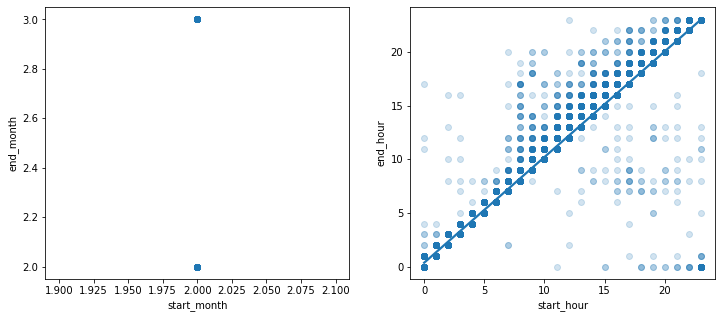

In [240]:
#Since both trip months and hours are discrete numberic, we can use a scatter plot to explore their relationships
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.scatter(data=df5, x='start_month', y='end_month')
plt.xlabel('start_month')
plt.ylabel('end_month')

plt.subplot(1,2,2)
sns.regplot(data=df5, x='start_hour', y='end_hour', scatter_kws={'alpha':1/5})
plt.xlabel('start_hour')
plt.ylabel('end_hour')

>**Observation**: The data visualization plot between the end_hour and start_hour does give a somewhat clear relationship. It shows a linear, positive correlation between the start and end hour for majority of data. This means that the duration diference between the start hour and the end hour is about one hour or less. 
The plot between the start_month and end_month shows a unitary relationship with biker trips bounds between second and third month of a year only.

##### Question 4:  What is the relationship between the distance covered and the duration taken for bikers' trip in the dataset

Text(0, 0.5, 'distance_km')

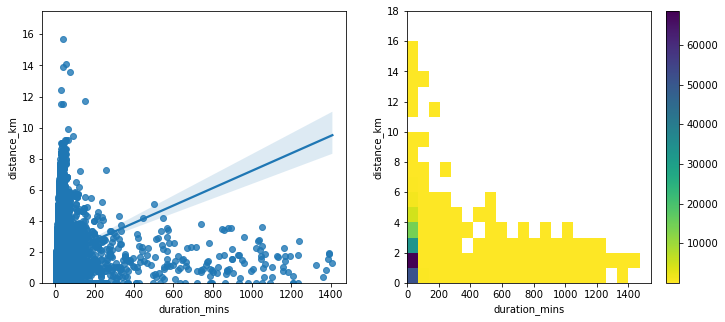

In [241]:
#Use the seaborn regplot to illustrate the relationship between duration and distance covered 
#With Outlier
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.regplot(data=df5, y='distance_km', x='duration_mins');
plt.ylim((0,17.5));

plt.subplot(1,2,2)
bins_x = np.arange(0, 1550+1.1, 70)
bins_y = np.arange(0, 70+1.1, 1)
plt.hist2d(data=df5, x='duration_mins', y='distance_km', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.ylim((0,18))
plt.colorbar()
plt.xlabel('duration_mins')
plt.ylabel('distance_km')

>**Observation**: Results illustrated from the above plot shows that the trip duration falls under 1400 secs. Also, it can be observed that the longer the duration of the trip the short the distance covered, which does not appear normal. 
We can use heatmaps to confirm our postulation, otherwise it might mean bikers took breaks during their trip hence the longer durations, shorter distance covered. Additional insights culled from the heatmap plot above shows that most of the trips were between a distance of 1-2km within 60 mins, although there were trip duration of about 1400mins.

### Explore the relationships between quantitative and qualitative features in the dataset

##### Question 5: What is the relationship between age grade vs distance covered and age grade vs trip duration  

In [242]:
# re-ordering the categorical age_grade type 
age_grade = ['Youth','Young Adult', 'Old Adult', 'Elderly']
agrade = pd.api.types.CategoricalDtype(ordered=True, categories=age_grade)
df5['age_grade'] = df5['age_grade'].astype(agrade);

In [243]:
def boxplot_generation(x, y, lim_x, lim_y):
    sns.boxplot(data=df5, x=x, y=y);
    plt.ylim((lim_x,lim_y));

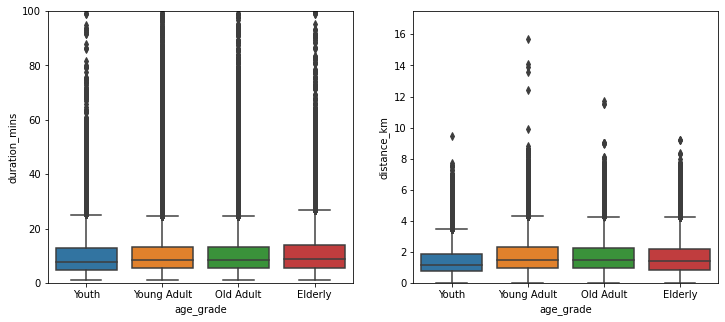

In [244]:
#plot of age_grade vs trip duration time

#Scaled
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
boxplot_generation('age_grade','duration_mins',0,100)

plt.subplot(1,2,2)
boxplot_generation('age_grade','distance_km',0,17.5)

>**Observation (age-grade vs duration)**: From the age_grade vs duration plot above, it is noticed that the median duration result of Young Adult and Old Adult are quite the same. The Elderly age group of bikers shows a higher interquantile range and hence larger whiskers boundary. This means the Elderly group spend more time on their trip compared to the rest of the age-group without consideration of the outliers in all the age-groups. The Youth age-group spend the least median duration time on trips.    

>**Observation (age-grade vs distance)**: From the plot on the right, the median distance covered by the young adult, old adult and elderly age-group can be seen to be the same. However, the elderly group is seen to have a slightly lower third percentile compared to aforementioned two groups. The youth age-group covered the least median distance compared to the rest. 

###### Question 6: What is the relationship pattern between age_groups vs ave_speed (m/s)

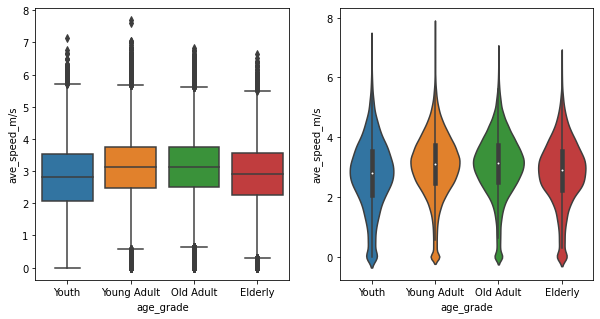

In [245]:
#plot of age_groups vs ave_speed covered
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(data=df5, x='age_grade', y='ave_speed_m/s');

plt.subplot(1,2,2)
sns.violinplot(data=df5, x='age_grade', y='ave_speed_m/s');

>**Observation**: The boxplot shows that on average speed of the elderly and the Youth age group have slower speed compared to the rest of the age groups. The violing plots shows that all the age groups have a normal statistical distribution.

###### Question 7: What is the relationship pattern between start days of week vs. biker user groups

In [246]:
ordered_days = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
start_day = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_days)
df5['start_day'] = df5['start_day'].astype(start_day)

In [247]:
user_counts = df5.groupby(['start_day','user_type']).size()
user_counts = user_counts.reset_index(name='count')
user_counts = user_counts.pivot(index='start_day', columns='user_type',values='count')

<AxesSubplot:xlabel='user_type', ylabel='start_day'>

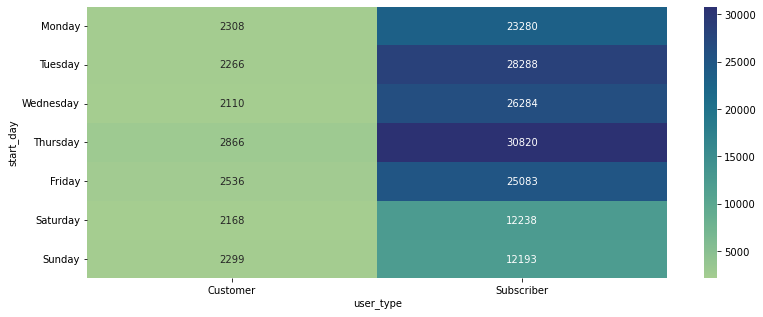

In [248]:
#A heatmap plot of biker user_type groups and bike trips start days of the week 
plt.figure(figsize=[13,5])
sns.heatmap(user_counts,annot=True, fmt='d', cmap='crest')

>**Observation**: The heatmap plot visualization above shows that there are more subscribers and slighly more customer user type bike trips on thursdays than any other days. While wednesday indicates a low number of bike start trips for customers, subscribers are less willing to start bike trips on sundays.

###### Question 8: What is the relationship pattern between start days of week vs. age-groups

In [249]:
#create a dataframe with age-grades, start-days and counts  
age_counts = df5.groupby(['start_day','age_grade']).size()
age_counts = age_counts.reset_index(name='count')
age_counts = age_counts.pivot(index='start_day', columns='age_grade', values='count')

In [250]:
def countplot_heatmap(x,y,palette_type,df,mod_counts,cmap_type):
    plt.subplot(1,2,1)
    sns.countplot(data=df, x=x, hue=y, palette=palette_type)
    plt.xticks(rotation=15)

    plt.subplot(1,2,2)
    plt.tight_layout(w_pad=10.0);
    sns.heatmap(mod_counts,annot=True, fmt='d', cmap=cmap_type)

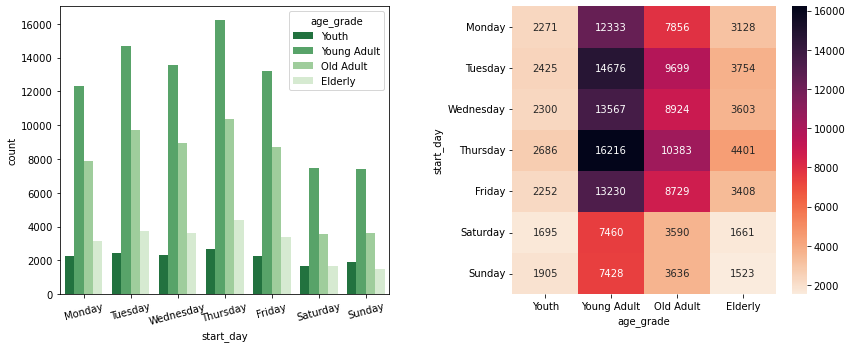

In [251]:
#A clustered bar plot of bike trips start days of the week vs. biker age-groups 
plt.figure(figsize=[12,5])
countplot_heatmap('start_day', 'age_grade', 'Greens_r', df5, age_counts,'rocket_r')

>**Observation**: countplot and heatmap shows that elderly bikers in this dataset are less likely to start bike trips on weekends, although weekends have generally low number of start trips compared to other days. Thursdays are still the most engaged day of bike start trips generally.

###### Question 9: How are bike start trips affected by days of week and daily time periods

In [252]:
df5['start_period'].value_counts()

Morning      67366
Afternoon    45993
Evening      36988
Night        24392
Name: start_period, dtype: int64

In [253]:
#order the start and end periods of the dataset
ordered_start_classes = ['Morning', 'Afternoon', 'Evening', 'Night']
ordered_classes = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_start_classes)
df5['start_period'] = df5['start_period'].astype(ordered_classes)
df5['end_period'] = df5['start_period'].astype(ordered_classes)

In [254]:
#create a new dataframe of ordered start_day, start_periods and its counts 
daily_p_counts = df5.groupby(['start_day','start_period']).size()
daily_p_counts = daily_p_counts.reset_index(name='count')
daily_p_counts = daily_p_counts.pivot(index='start_day', columns='start_period', values='count')

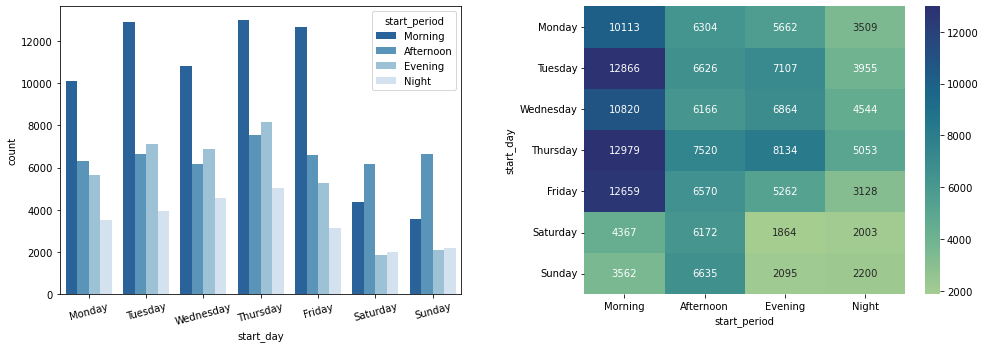

In [255]:
#A clustered bar plot of bike trips start days of the week vs. start daily periods 
plt.figure(figsize=[14,5])

countplot_heatmap('start_day', 'start_period', 'Blues_r', df5, daily_p_counts,'crest')

>**Observation**: The data visualization results shows that on weekends there are more start bike trips in the afternoon period than any other time period. On weekdays, morning period witness the most bike trip start engagement. During the weekdays, except on mondays and fridays, there are more start bike trips in the evening than in afternoon and night time period.   

In [256]:
df5.sample(3)

,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,end_month,start_hour,end_hour,start_period,end_period,age_grade,ave_speed_m/s,distance_km,duration_mins
11042,343,323,6070,Subscriber,1967,Male,No,2,Wednesday,2,18,18,Evening,Evening,Elderly,3.208660,1.976535,10.266667
110186,26,15,5458,Subscriber,1971,Male,No,2,Tuesday,2,8,8,Morning,Morning,Elderly,2.066598,0.901037,7.266667
139322,43,62,1316,Subscriber,1980,Male,No,2,Thursday,2,9,9,Morning,Morning,Old Adult,2.535344,0.841734,5.533333


###### Question 10: How well do certain user_type engage in bike trip at certain start hours of the day

In [257]:
def facetgrid_plot(df, col, sharey_state, hue):
    g = sns.FacetGrid(data=df, col=col, sharey=sharey_state)
    g.map(plt.hist, hue)

<Figure size 864x360 with 0 Axes>

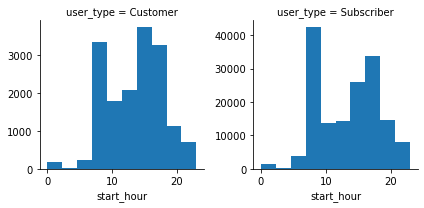

In [258]:
# facetgrid - histplot: user_type vs start hour 
plt.figure(figsize=[12,5])
facetgrid_plot(df5, 'user_type', False, 'start_hour')

>**Observation**: From the facetgrid plot above, it can be observed that most customers have a peak afternoon average demand start bike trip hours while subscribers have a peak morning average demand start bike trip and less afternoon peak demand. 

###### Question 11: What is the relationship between user_type vs. ave_speed

(0.0, 7.5)

<Figure size 864x360 with 0 Axes>

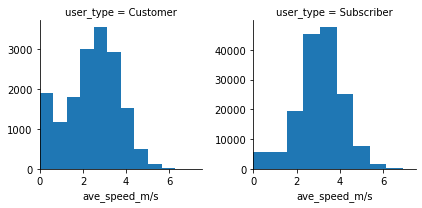

In [259]:
# facetgrid - histplot: user_type vs ave_speed
plt.figure(figsize=[12,5])
facetgrid_plot(df5, 'user_type', False, 'ave_speed_m/s')
plt.xlim((0,7.5))

>**Observation**: The data visualization plot above shows that customers do have an average speed peak of 3 m/s while subscribers have a slightly above average speed peak of 3.5m/s. This may be because there are far more data available for subscriber compared to customers

###### Question 12: What is the relationship between bike_share_for_all_trip vs. ave_speed

(0.0, 7.5)

<Figure size 864x360 with 0 Axes>

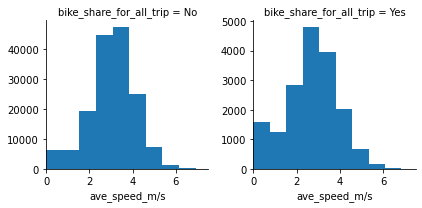

In [260]:
# facetgrid - histplot: bike_share_trip vs ave_speed 
plt.figure(figsize=[12,5])
facetgrid_plot(df5,'bike_share_for_all_trip', False, 'ave_speed_m/s')
plt.xlim((0,7.5))

>**Observation**: Although, there is a imbalance data for both 'yes' and 'no' options for bike share for all trips. Based on the countplot above, bike share options with 'No' show a higher average speed peak compared to the bike share option with 'yes' 

###### Question 13: What is the relationship between bike_share_for_all_trip vs. distance_km

(0.0, 20.0)

<Figure size 864x360 with 0 Axes>

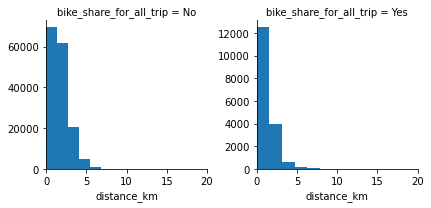

In [261]:
# facetgrid - histplot: bike_share_trip vs distance_km
plt.figure(figsize=[12,5])
facetgrid_plot(df5,'bike_share_for_all_trip', False, 'distance_km')
plt.xlim((0,20))

>**Observation**: Generally, it is shown that the bike share option trip with 'Yes' has slightly more distance covered compared to the bike share option trip with 'No'

###### Question 14: What is the relationship between age_grade vs. ave_speed_m/s

<AxesSubplot:xlabel='age_grade', ylabel='ave_speed_m/s'>

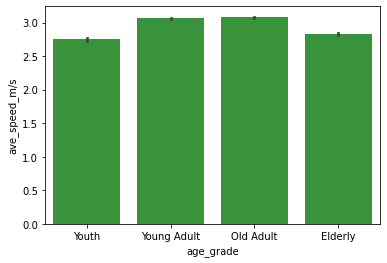

In [262]:
# adapted barplot - barplot: age_grad vs ave_speed 
base_color = sns.color_palette()[2]
sns.barplot(data=df5, x='age_grade', y='ave_speed_m/s', color=base_color)

>**Observation**: It is clear from the plot that young adult and old adults engage in higher average speed compared with the elderly and youths age grades 

###### Question 15: What is the relationship between trip start periods vs. trip duration

In [263]:
def pointplot(df, x, y):
    base_color = sns.color_palette()[3]
    sns.pointplot(data=df5, x=x, y=y, color=base_color,linestyles="")

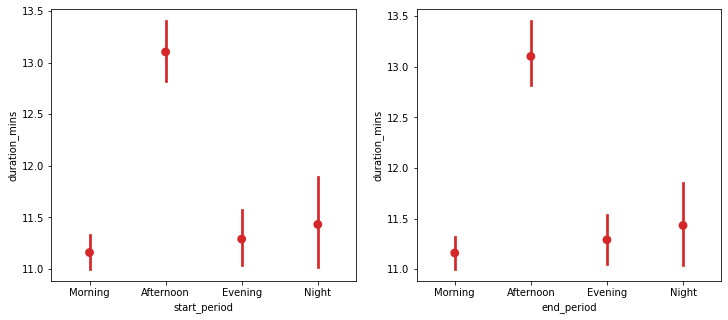

In [264]:
# Pointplot: start_period vs ave_speed 
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
pointplot(df5, 'start_period', 'duration_mins')

plt.subplot(1,2,2)
pointplot(df5, 'end_period', 'duration_mins')

>**Observation**: It is clear from the above plot that longest bike time duration for bike trips occurs in the afternoon for both start and end periods. While morning bike trip start and end period has the lowest bike time duration.

#### Question 16: What is the relationship between trip start periods vs. trip distance

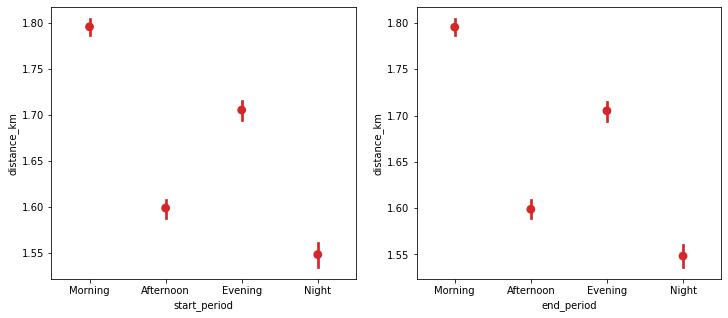

In [265]:
# Pointplot: start_period vs ave_speed 
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
pointplot(df5, 'start_period', 'distance_km')

plt.subplot(1,2,2)
pointplot(df5, 'end_period', 'distance_km')

>**Observation**: It is clear from the above plot that the longest distances covered by the bikers occur in the morning period, this is followed by evening and aftenoon and Night periods.

## Multivariate Exploration


In [266]:
df5.sample(3)

,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,end_month,start_hour,end_hour,start_period,end_period,age_grade,ave_speed_m/s,distance_km,duration_mins
61002,61,116,5098,Subscriber,1957,Male,No,2,Wednesday,2,13,13,Afternoon,Afternoon,Elderly,3.318629,1.951354,9.800000
89600,218,160,5391,Subscriber,1983,Male,No,2,Friday,2,17,17,Evening,Evening,Old Adult,4.724895,1.152874,4.066667
60200,343,21,5310,Subscriber,1981,Male,No,2,Wednesday,2,16,16,Afternoon,Afternoon,Old Adult,3.239738,0.958963,4.933333


#### Question 17: Is there a correlation between trip distance covered across all gender types 

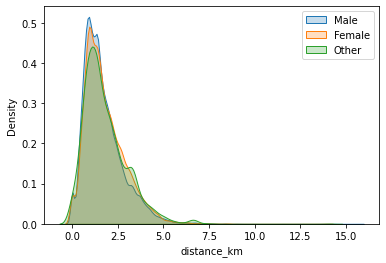

In [267]:
#Plot the dataset age distribution using Kde to show the spread of ages
sns.kdeplot(df5.distance_km[df5.member_gender=='Male'], label='Male', shade=True) #blue color
sns.kdeplot(df5.distance_km[df5.member_gender=='Female'], label='Female', shade=True) #orange color
sns.kdeplot(df5.distance_km[df5.member_gender=='Other'], label='Other', shade=True) #orange color
plt.xlabel('distance_km')
plt.legend(['Male', 'Female', 'Other'])
plt.show()

>**Observation**: Generally, all gender types have the similar distribution plot for distance covered with the male gender having a slightly higher peak density

#### Question 18: Is there a correlation between trip duration across all gender types 

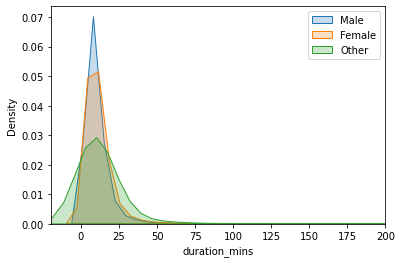

In [268]:
#Plot the dataset age distribution using Kde to show the spread of ages
sns.kdeplot(df5.duration_mins[df5.member_gender=='Male'], label='Male', shade=True) #blue color
sns.kdeplot(df5.duration_mins[df5.member_gender=='Female'], label='Female', shade=True) #orange color
sns.kdeplot(df5.duration_mins[df5.member_gender=='Other'], label='Other', shade=True) #orange color
plt.xlabel('duration_mins')
plt.legend(['Male', 'Female', 'Other'])
plt.xlim((-20,200))
plt.show()

>**Observation**: From the statistical distribution plot stated above, the 'other' gender has much higher standard deviation compared to the the male and female gender. While the Male gender has a higher density function for the trip duration embarked upon 

##### Question 19: How well does the distribution of gender spread across the relationship between duration and distance in the dataset

In [269]:
df5.member_gender.value_counts()

Male      130331
Female     40764
Other       3644
Name: member_gender, dtype: int64

<Figure size 864x360 with 0 Axes>

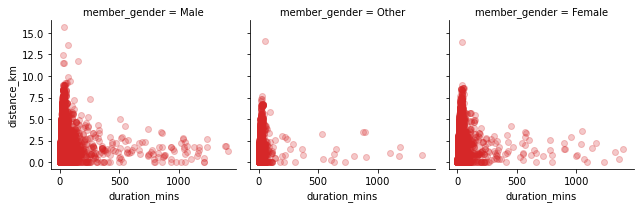

In [270]:
plt.figure(figsize=[12,5])
g = sns.FacetGrid(data=df5, col='member_gender', col_wrap=3)
g.map(plt.scatter, 'duration_mins','distance_km', alpha=0.25, color=sns.color_palette()[3]);
plt.show()

>**Observation**: The plot above shows that slightly more of the male gender engages in longer distance bike trips than other genders. 
    

##### Question 20: How well does the distribution of user group spread across the relationship between bike trip duration and distance covered

In [271]:
df5['user_type'].value_counts()

Subscriber    158186
Customer       16553
Name: user_type, dtype: int64

<Figure size 864x360 with 0 Axes>

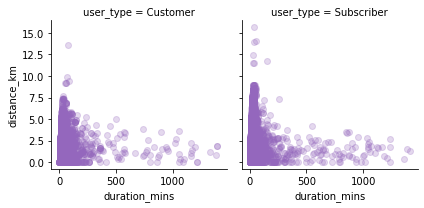

In [272]:
plt.figure(figsize=[12,5])
g = sns.FacetGrid(data=df5, col='user_type', col_wrap=2)
g.map(plt.scatter, 'duration_mins','distance_km', alpha=0.25, color=sns.color_palette()[4])
plt.show()

>**Observation**: The plot above shows that slightly more subscribers engage in longer distance bike trips than customers  

##### Question 21: How well does the distribution of bike share trip options spread on the relationship between bike trip duration and distance covered

<Figure size 864x360 with 0 Axes>

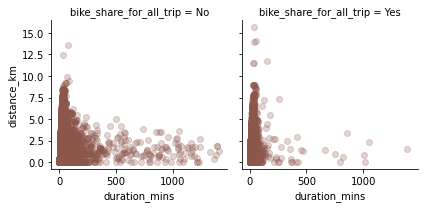

In [273]:
plt.figure(figsize=[12,5])
g = sns.FacetGrid(data=df5, col='bike_share_for_all_trip', col_wrap=2)
g.map(plt.scatter, 'duration_mins','distance_km', alpha=0.25, color=sns.color_palette()[5]);
plt.show()

>**Observation**: The multivariate plot above shows that bike share trips with 'No' options engage in more longer distance bike trips than bike share with 'Yes' option. While the bike share trips with option 'Yes' then to spend longer trip duration that bike trips with option 'No'

## Conclusions
- The original bike trip dataset had 183412 observations and 16 features. This was modified to 174952 observations and 18 features using feature engineering, dropping of null data and irrelevant features.

- An overview of the modified dataset shows that 91% of the bikers are subscribers, 9% are customers. 75% of bikers are male, 23% females, 2% identify as others. 10% of the bikers prefer the biker sharing option while 90% do not.

- It is observed from the kde plot there is not much difference between the start hour and end hour of bike trips but that there are bi-modal distributions for the start and end bike trips with the two peak bike trip demands at the morning and evening periods 

- Outputs of feature engineered data output revealed that there are more 'young adults' age-group biker trips than any other age-groups. The next set of age-groups trips counts in decreasing order are the 'older adults', 'elderly' and then 'youth' age_grade groups

- 75% of bikers covered a distance of 2.2km for a period of about 13 minutes (less than an hour). Although, there were few bike trips with long duration of a max of about 1400 minutes. This could be that bikers took rest breaks before completing the trip 

- Thursdays are more popular amongs bikers for a trip start while weekends generally have low number of bike trip starts for subscriber user types. For customers, wedneday have the lowest number of bike start trip engagements with thursdays the highest

- On weekends, there are more bike trips in the afternoon period than any time period, while on weekdays, the morning period have the most bike trip start engagments. The elderly age group are less reluntant to engage in weekend bike trip start. 

- The average speed of the elderly and the Youth age group is slower compared to the rest of the age groups. The violing plots shows that all the age groups have a normal statistical distribution.

- The longest bike time duration for bike trips occurs in the afternoon for both start and end periods. While morning bike trip start and end period has the lowest bike time duration. While the longest distances covered by the bikers occur in the morning period, this is followed by evening and aftenoon and Night periods.

- Those who chose a 'No' bike share option have higher peak average speed and cover longer distances and then shorter trop duration than those who chose 'Yes' bike share option. Although, this subject to further data exploration using mean values instead of count values due to the imbalance in data. 

- More of the male gender tend to engage in longer distance bike trips than other genders while there is no distinct gender type which engage in longer duration bike trips. 

- More subscribers engage in longer distance bike trips than customers while there is no distinct user type which engage in longer duration bike trips


In [274]:
 df5.to_csv('modified_FordGoBike.csv', index=False)